# Getting some hands-on experience with supervised machine learning

## Question 1

In this tutorial we will work with supervised machine learning. We will classify tweets into four categories namely: `normal`, `abusive`, `hateful`, and `spam`.

As you noted when reading the literature assigned for this and last week, there are a few steps that we need to take before we can use supervised machine learning. Namely:
* Collect data (in CS often texts, e.g., tweets)
* Develop a codebook and hand-code the data

In this tutorial, we focus on the actual machine learning part of the process. Hence, we will use a dataset that already has been coded by humans. It contains tweets and each tweet has a label indicating to which of four categories it belongs, namely normal, abusive, hateful, or spam. Hence, we skip the first two steps of the process described above.

Download the data for this exercise named "hatespeech_text_label_vote_RESTRICTED_100K.csv". These datafiles were retrieved from: https://www.dropbox.com/sh/4mapojr85a6sc76/AABYMkjLVG-HhueAgd0qM9kwa?dl=0

Using the examples from past lectures, can you write a script that opens each file and:
* Creates one list with the tweets
* Creates one list with the labels of the tweets

What could you do to check that this process went well? Can you explore the data a bit (i.e., by checking how often each label is present in the different datasets)?

In [1]:
### Model answer

import csv
from collections import Counter
import matplotlib.pyplot as plt


file = "hatespeech_text_label_vote_RESTRICTED_100K.csv"
tweets = []
labels = []

with open(file) as fi:
    data = csv.reader(fi, delimiter='\t')
    for row in data:
        tweets.append(row[0])
        labels.append(row[1])

print("First 3 Tweets:\n", tweets[:3])
print("\nFirst 3 Labels:\n", labels[:3])

First 3 Tweets:
 ['Beats by Dr. Dre urBeats Wired In-Ear Headphones - White https://t.co/9tREpqfyW4 https://t.co/FCaWyWRbpE', 'RT @Papapishu: Man it would fucking rule if we had a party that was against perpetual warfare.', 'It is time to draw close to Him &#128591;&#127995; Father, I draw near to you now and always ❤️ https://t.co/MVRBBX2aqJ']

First 3 Labels:
 ['spam', 'abusive', 'normal']


In [2]:
print(len(tweets) == len(labels)) # there should be just as many tweets as there are labels

True


<BarContainer object of 4 artists>

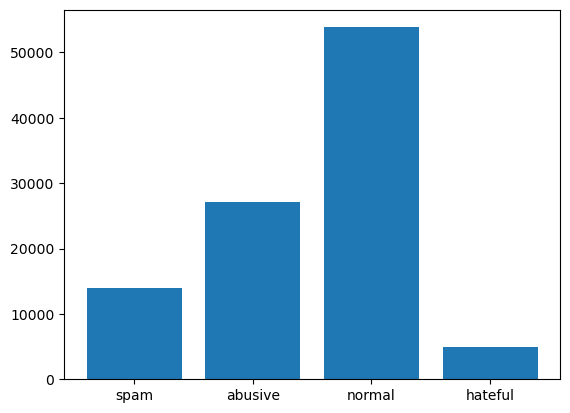

In [3]:
Counter(labels)
plt.bar(Counter(labels).keys(), Counter(labels).values())

## Question 2

Now that we have read in the data, we will proceed to the next step: Splitting our data into a training set and a test set. Luckily, scikit-learn has a function that can do so for us! Run the code presented in the next block to split up the dataset.
        
* What do these lines of code do?
* Do you know what the random_state part refers to? Why is this useful?


In [4]:
from sklearn.model_selection import train_test_split

tweets_train, tweets_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.2, random_state=42)

**Model answer**

This function splits the dataset into a train set (80% of the data) and a test set (20% of the data). The `random_state` argument can be used to keep the same results the next time you run this same function. This can be useful if you want to reproduce your results!

## Question 3

On to the next step: Transforming the text into numbers, or setting up a vectorizer. Can you create some code that uses a count vectorizer on the texts that you read in? Hint: check out the example provided in the slides of previous weeks! Doing so, you will see that the stopwords are defined (as a built-in stop word list). Why is that done?

In [5]:
### Model answer

from sklearn.feature_extraction.text import (CountVectorizer)

countvectorizer = CountVectorizer(stop_words="english")
X_train = countvectorizer.fit_transform(tweets_train)
X_test = countvectorizer.transform(tweets_test)

# Stopwords are defined so that stopwords can be identified and excluded.

## Question 4

Now, let’s train a classifier and run it on the test data! Can you use the example from this week's lecture to train a Naïve Bayes classifer with our count vectorizer?

In [6]:
### Model answer

from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

## Question 5

When you run the code you created for the previous question, you will see that it prints no output. How do you know if your code worked? Run the code presented in the next block (depending on how you named your labels, you may need to adjust the arguments).

Check out the documentation of the scikit learn package: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

What do the numbers in the output mean? What can you do with it?

In [7]:
from sklearn.metrics import classification_report

print(y_pred[:10])
print(classification_report(y_test, y_pred))

['normal' 'normal' 'normal' 'normal' 'spam' 'normal' 'normal' 'normal'
 'abusive' 'normal']
              precision    recall  f1-score   support

     abusive       0.81      0.88      0.85      5369
     hateful       0.83      0.05      0.10       966
      normal       0.78      0.93      0.85     10848
        spam       0.67      0.30      0.41      2817

    accuracy                           0.78     20000
   macro avg       0.77      0.54      0.55     20000
weighted avg       0.78      0.78      0.75     20000



## Question 6

Our last classifier was based on a count vectorizer using Naïve Bayes. Can you now train another classifier based on `Logistic Regression` and a `tf-idf vectorizer`?

In [8]:
### Model answer

from sklearn.feature_extraction.text import (TfidfVectorizer)
from sklearn.linear_model import (LogisticRegression)


Tfidfvectorizer = TfidfVectorizer(stop_words="english")
X_train = Tfidfvectorizer.fit_transform(tweets_train)
X_test = Tfidfvectorizer.transform(tweets_test)

logres = LogisticRegression(max_iter=1000)
logres.fit(X_train, y_train)

y_pred = logres.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     abusive       0.87      0.90      0.88      5369
     hateful       0.66      0.25      0.37       966
      normal       0.82      0.89      0.85     10848
        spam       0.57      0.48      0.52      2817

    accuracy                           0.80     20000
   macro avg       0.73      0.63      0.66     20000
weighted avg       0.79      0.80      0.79     20000



## Question 7

As you saw in the article by Meppelink et al. (2021), we can try different combinations of these models (Naïve Bayes and Logistic Regression) and vectorizers (count and tf-idf). If you want to use Naïve Bayes and Logistic Regression as the models for a classifier, and a count vectorizer and a tf-idf vectorizer, how many classifiers could you then train? 

**Model Answer**: You could then train 2 (count vectorzier vs. tf-idf vectorizer) * 2 (Naïve Bayes vs. Logistic Regression) = 4 classifiers.

## Question 8

If we want to train multiple different classifiers, we could simply copy-paste the code used in the previous questions and adjust it for each of the classifiers. However, a cleaner approach is to write a function in which we define the specifics of each classifier. The code below does that.

In this code, we create a loop that trains each classifier by calling the function that is built in the first part of the code. 

Run the code below and compare it to the code that you wrote to train one classifier: Do you understand what is happening there?

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

configs = [
    ("NB-count", CountVectorizer(min_df=5, max_df=.5), MultinomialNB()),
    ("NB-TfIdf", TfidfVectorizer(min_df=5, max_df=.5), MultinomialNB()),
    ("LR-Count", CountVectorizer(min_df=5, max_df=.5), LogisticRegression(solver="liblinear")),
    ("LR-TfIdf", TfidfVectorizer(min_df=5, max_df=.5), LogisticRegression(solver="liblinear"))
]

for name, vectorizer, classifier in configs:
    print(name)
    X_train = vectorizer.fit_transform(tweets_train)
    X_test = vectorizer.transform(tweets_test)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print(classification_report(y_test, y_pred))

NB-count
              precision    recall  f1-score   support

     abusive       0.80      0.88      0.84      5369
     hateful       0.41      0.28      0.33       966
      normal       0.85      0.79      0.82     10848
        spam       0.53      0.63      0.57      2817

    accuracy                           0.77     20000
   macro avg       0.65      0.64      0.64     20000
weighted avg       0.77      0.77      0.77     20000

NB-TfIdf
              precision    recall  f1-score   support

     abusive       0.81      0.81      0.81      5369
     hateful       0.87      0.05      0.09       966
      normal       0.76      0.92      0.83     10848
        spam       0.65      0.32      0.43      2817

    accuracy                           0.77     20000
   macro avg       0.77      0.53      0.54     20000
weighted avg       0.76      0.77      0.73     20000

LR-Count
              precision    recall  f1-score   support

     abusive       0.87      0.91      0.89     

## Question 9

Check out the documentation of scikit learn (https://scikit-learn.org/stable/supervised_learning.html). Can you try to use other models and train a classifier with them? Can you merge this code into the code used in the previous question?

In [10]:
### Model answer

# Various answers are possible here, but let's try a model based on K nearest neighbours for example:

from sklearn.neighbors import KNeighborsClassifier

configs = [
  ("NB-count",CountVectorizer(min_df=5,max_df=.5),
   MultinomialNB()),
  ("NB-TfIdf",TfidfVectorizer(min_df=5,max_df=.5),
   MultinomialNB()),
  ("LR-count",CountVectorizer(min_df=5,max_df=.5),
   LogisticRegression(solver="liblinear")),
  ("LR-TfIdf",TfidfVectorizer(min_df=5,max_df=.5),
   LogisticRegression(solver="liblinear")),
  ("KNN-count",CountVectorizer(min_df=5,max_df=.5),
  KNeighborsClassifier(n_neighbors=3)),
  ("KNN-tfidf",TfidfVectorizer(min_df=5,max_df=.5),
  KNeighborsClassifier(n_neighbors=3))]


for name, vectorizer, classifier in configs:
    print(name)
    X_train = vectorizer.fit_transform(tweets_train)
    X_test = vectorizer.transform(tweets_test)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("\n") 


# Note that only the first part of the code needs to be adjusted!
# Also note that running the KNN classifier takes a bit of time...

NB-count
              precision    recall  f1-score   support

     abusive       0.80      0.88      0.84      5369
     hateful       0.41      0.28      0.33       966
      normal       0.85      0.79      0.82     10848
        spam       0.53      0.63      0.57      2817

    accuracy                           0.77     20000
   macro avg       0.65      0.64      0.64     20000
weighted avg       0.77      0.77      0.77     20000



NB-TfIdf
              precision    recall  f1-score   support

     abusive       0.81      0.81      0.81      5369
     hateful       0.87      0.05      0.09       966
      normal       0.76      0.92      0.83     10848
        spam       0.65      0.32      0.43      2817

    accuracy                           0.77     20000
   macro avg       0.77      0.53      0.54     20000
weighted avg       0.76      0.77      0.73     20000



LR-count
              precision    recall  f1-score   support

     abusive       0.87      0.91      0.89 

## Question 10

Based on the output that the classifier prints, what classifier performs the best? In your answer, consider:
* What information you need to identify the best classifier
* What metric you base your conclusion (i.e., precision, recall, accurcay, or F1-score) on and why?

**Model answer**

Depending on the metric that you base your evaluation on, a different classifier could be considered best. The best metric in turn, differs depending on what a classifier is used for.

In this case, no specific information about the usage of the classifier is provided. Therefore, the F1-score may be the best metric to use.

## Question 11

Let's say that you base your evaluation on the F1-score of the classifier. You can choose between the macro average and the weighted average of the F1-score. Check out the scikit learn documentation (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html). What F1-value (macro average or weighted average) would you select?

**Model answer**

From the documentation:

'macro': Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

'weighted': Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F1-score that is not between precision and recall. We saw earlier that there are relatively many normal tweets present in the dataset. To account for this, the weighted average may be a good choide.

## Question 12

When looking at the classification report, you will see another column indicating values for something labelled 'support'.
Can you do some searching online and find out what 'support' is?

**Model answer**: Support refers to the number of true instances for each label ([reference](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)).

## Question 13

Two researchers want to use the classifier to distinguish between tweets that are spam or hateful and tweets that are not (either because they are normal or abusive). 
They are, however, not happy with the performance of the classifier when looking at the accuracy, precision, and recall for the spam category or the hateful category.
One of the researchers suggests to first recode the labels, so that all tweets that were annotated as spam receive a label 'spam' or 'hateful' are grouped together and all other tweets are grouped together as well.

What would the consequences be of doing so? What can you do to check your own answer? Try to recode the labels and see what happens!

**Model answer**

It could increase the performance of the machine because the groups are no made larger and more easy to dinstinguish... Or the groups are made too larger and therefore too vague, making it harder to distinguish between categories, decreasing the performance of the machine...

You can recode the labels and train/validate the machines again to see what happens!

## Question 14

For now, let's say that the classifier based on a count vectorizer and Logistic Regression is the one we prefer. We now want to use this model to predict the label for new data that we have not annotated (remember, this was the whole goal of SML)!

To do this, let’s save our classifier and our vectorizer to a file. If we don’t do this, we would need to re-train our model every time we want to use it. This is not so convenient, for example, we would always need to have our training data at hand. The code below shows you how to make a vectorizer and train a classifier (a repetition of what we did before to show you the whole process) and finally store them into a file for future use.

In the code, you will see that both the classifier and the vectorizer are stored into a file. Why do you need to store both (why not just store the classifier only)?

In [11]:
import pickle
import joblib

# Make a vectorizer and train a classifier
vectorizer=CountVectorizer(min_df=5, max_df=.5)
classifier=LogisticRegression(solver="liblinear")
X_train=vectorizer.fit_transform(tweets_train)
classifier.fit(X_train, y_train)

# Save them to disk
with open("myvectorizer.pkl",mode="wb") as f:
    pickle.dump(vectorizer, f)
with open("myclassifier.pkl",mode="wb") as f:
    joblib.dump(classifier, f)

# Later on, re-load this classifier and apply:
new_tweets = ["This Tweet is very shitty nasty mean and hateful", 
            "This is a very normal normal tweet.", 
            "2%^&GHJ &(&hrqjf3 click this link"]

with open("myvectorizer.pkl",mode="rb") as f:
    myvectorizer = pickle.load(f)
with open("myclassifier.pkl",mode="rb") as f:
    myclassifier = joblib.load(f)
    
new_features = myvectorizer.transform(new_tweets)
pred = myclassifier.predict(new_features)

for tweet, label in zip(new_tweets, pred):
    print(f"'{tweet}' is probably '{label}'.")

'This Tweet is very shitty nasty mean and hateful' is probably 'abusive'.
'This is a very normal normal tweet.' is probably 'normal'.
'2%^&GHJ &(&hrqjf3 click this link' is probably 'spam'.


The vectorizer needs to be stored as well. Remember what we talked about earlier: once a vectorizer is fit on certain data, fitting it again on new data changes the set up of the vectorizer!